In [211]:
from pathlib import Path
import numpy as np

out_dir = Path("./out") / "lab3" / "plc"
recs = Path("../Labs/") / "3" / "Recs" / "plc"

In [207]:
def read_rigol_csv(file, unpack=True, **kwargs):
    return np.loadtxt(
        file, delimiter=",",
        skiprows=2, usecols=(0, 1, 2),
        unpack=unpack, **kwargs)

def similar_time_base(t1, t2, **isclose_kwargs):
    return np.isclose(
        np.diff(t1).mean(),
        np.diff(t2).mean(), **isclose_kwargs)

def find_delay(sig1, sig2, t=None, dt=1):
    """
    Finds the delay in `sig2` with respect to `sig1`
    """
    if t is not None:
        dt = np.diff(t).mean()
    lags = signal.correlation_lags(
        len(sig1), len(sig2))
    return lags[
        signal.correlate(sig2, sig1).argmax()] * dt

def align_with(t, ref, ref2):
    return t - find_delay(ref, ref2, t=t)

In [271]:
ensayo_ = Path("e5") / "c1"
ensayo = recs / ensayo_
out_ensayo = out_dir / ensayo_
out_ensayo.mkdir(parents=True, exist_ok=True)
xlim = (-19, -1)

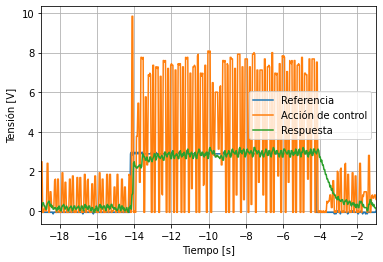

In [272]:
from matplotlib import pyplot as plt

t, ref, out = read_rigol_csv(ensayo / "ref_out.csv")
t2, u, out2 = read_rigol_csv(ensayo / "u_out.csv")

if similar_time_base(t, t2):
    fig, ax_ref = plt.subplots()
    ax_u = ax_ref
    t2 = align_with(t2, out, out2)
else:
    fig, (ax_ref, ax_u) = plt.subplots(2, sharex=True)
    ax_ref.plot(t, out, label="Respuesta")

ax_ref.plot(t, ref, label="Referencia")
ax_u.plot(t2, u, label="Acción de control")
ax_u.plot(t2, out2, label="Respuesta")
ax_u.set_xlabel("Tiempo [s]")

for ax in (ax_u, ax_ref):
    ax.set_ylabel("Tensión [V]")
    ax.set_xlim(xlim)
    ax.grid(True)
    ax.legend()

fig.savefig(out_ensayo / "resp.svg")

In [273]:
t_pert, u_pert, out_pert = read_rigol_csv(ensayo / "u_out_pert.csv")

if similar_time_base(t, t_pert):
    fig, ax_ref = plt.subplots()
    ax_u = ax_ref
    t_pert = align_with(t_pert, out, out_pert)
else:
    fig, (ax_ref, ax_u) = plt.subplots(2, sharex=True)
    ax_ref.plot(t, out, label="Respuesta")

ax_ref.plot(t, ref, label="Referencia")
ax_u.plot(t_pert, u_pert, label="Acción de control")
ax_u.plot(t_pert, out_pert, label="Respuesta perturbada")
ax_u.set_xlabel("Tiempo [s]")

for ax in (ax_u, ax_ref):
    ax.set_ylabel("Tensión [V]")
    ax.set_xlim(xlim)
    ax.grid(True)
    ax.legend()

fig.savefig(out_ensayo / "pert.svg")

OSError: ../Labs/3/Recs/plc/e5/c1/u_out_pert.csv not found.

In [ ]:
import sympy as sp
from sympy.abc import z
from utils.ratpolys import ratpoly_zpk_form, f2zpk

#kpi, a = sp.symbols("K_pi a")
kp, tc, tn = sp.symbols("K_p T_c T_n")

pi_tf = kp*tc/tn*z/(z-1)+kp

ratpoly_zpk_form(pi_tf, z)
_, _, k = f2zpk(pi_tf, z)
k.simplify()

K_p*(T_c + T_n)/T_n

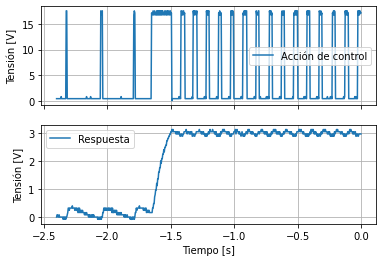

In [ ]:
p2 = recs / "p2" / "c1"
out_ = out_dir / "p2" / "c1"
out_.mkdir(parents=True, exist_ok=True)

t, u, out = read_rigol_csv(p2 / "u_out.csv")
fig, (ax_ref, ax_u) = plt.subplots(2, sharex=True)
ax_ref.plot(t, u, label="Acción de control")
ax_u.plot(t, out, label="Respuesta")

ax_u.set_xlabel("Tiempo [s]")
for ax in (ax_u, ax_ref):
    ax.set_ylabel("Tensión [V]")
    ax.grid(True)
    ax.legend()

fig.savefig(out_ / "resp.svg")